# 통계분석/ [기술 통계 분석 + 그래프] 와인 품질 예측하기

## 1) 데이터 수집

 - 캘리포니아 어바인 대학의 머신러닝 저장소에서 제공하는 오픈 데이터를 사용


## 2) 데이터 준비

### - 다운로드한 CSV 파일 정리하기

In [1]:
import pandas as pd
red_df = pd.read_csv('C:/Users/Jung Suk Won/파이썬/데이터과학및분석/03 통계 분석/winequality-red.csv', sep = ';', header = 0, engine = 'python')
white_df = pd.read_csv('C:/Users/Jung Suk Won/파이썬/데이터과학및분석/03 통계 분석/winequality-white.csv', sep = ';', header = 0, engine= 'python')
red_df.to_csv('C:/Users/Jung Suk Won/파이썬/데이터과학및분석/03 통계 분석/winequality-red2.csv', index = False)
white_df.to_csv('C:/Users/Jung Suk Won/파이썬/데이터과학및분석/03 통계 분석/winequality-white2.csv', index = False)

- 01행 테이블 형태의 CSV 파일을 다루기 위해 pandas 라이브러리 패키지를 pd 이름으로 로드
- 02~03행 pandas의 read_csv() 함수를 사용해 CSV 파일을 읽어온음 이때 CSV 파일 데이터의 열 구분자를 세미콜론으로 지정하기 위해 sep 매개변수 값을 ‘;’으로 지정
- 04~05행 pandas로 읽은 CSV 데이터는 테이블 형태의 DataFrame 객체(red_df, white_df)에 있음이 상태 그대로 CSV 파일로 저장

## 3) 데이터 병합하기

### - 레드 와인 파일을 읽고 데이터프레임에 ‘type’ 열 삽입하기

In [2]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- red_df에 저장된 내용을 위에서부터 5개(0번~4번) 행만 출력하여 확인

In [3]:
red_df.insert(0, column = 'type', value = 'red')
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- red_df에 저장된 내용을 위에서부터 5개(0번~4번) 행만 출력하여 확인
- red_df에 저장된 내용을 위에서부터 5개(0번~4번) 행만 다시 출력해 삽입된 ‘type’열을 확인

In [4]:
red_df.shape

(1599, 13)

- red_df.shape를 이용하여 현재 red_df의 크기를 ‘(행의 개수, 열의 개수)’ 형태로 확인

### - 화이트 와인 파일을 읽고 데이터프레임에 ‘type’ 열 삽입하기

In [5]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


- white_df에 저장된 내용을 위에서부터 5개(0번~4번) 행만 출력하여 확인

In [6]:
white_df.insert(0, column = 'type', value = 'white')
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


- 이름이 ‘type’이고 값이 ‘white’인 열을 만들어 index = 0(첫 번째 열) 자리에 삽입
- white_df에 저장된 내용을 위에서부터 5개(0번~4번) 행만 다시 출력해 삽입된‘type’ 열을 확인

In [7]:
white_df.shape

(4898, 13)

- white_df.shape를 이용하여 현재 white_df의 크기를 ‘(행의 개수, 열의 개수)’ 형태로 확인

### - red_df와 white_df를 하나의 데이터프레임 형식으로 결합하기

In [8]:
wine = pd.concat([red_df, white_df])
wine.shape

(6497, 13)

- pd.concat() 함수를 이용하여 red_df와 white_df를 결합
- 결합된 wine의 현재 크기를 ‘(행의 개수, 열의 개수)’ 형태로 확인

In [9]:
wine.to_csv('C:/Users/Jung Suk Won/파이썬/데이터과학및분석/03 통계 분석/wine.csv', index = False)

- wine을 CSV 파일로 저장

## 4) 데이터 탐색

### 4-1 기본 정보 확인하기

In [10]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


- 기본 정보 확인하기

### 4-2 함수를 사용해 기술 통계 구하기

In [11]:
wine.columns = wine.columns.str.replace(' ', '_')
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- 열 이름에 공백이 있으면 밑줄로 바꾼 뒤 한 단어로 연결
- 변경된 열 이름을 확인

In [12]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


- describe() 함수를 사용하여 속성별 개수, 평균, 표준편차, 최소값, 전체 데이터 백분율에 대한 25번째 백분위수(25%), 중앙값인 50번째 백분위수(50%), 75번째 백분위수(75%) 그리고 100번째 백분위수인 최대값max을 출력

In [13]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

- wine.quality.unique() 함수를 사용하여 quality 속성값 중에서 유일한 값을 출력이를 통해 와인 품질 등급quality은 3, 4, 5, 6, 7, 8, 9의 7개 등급이 있다는 것을 알 수 있음

In [14]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

- quality.value_counts() 함수는 quality 속성값에 대한 빈도수를 보여줌 6등급인 샘플이 2,826개로 가장 많고, 9등급인 샘플이 5개로 가장 적은 것을 알 수 있음

## 4) 데이터 모델링

### 4-1 describe() 함수로 그룹 비교하기

In [15]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


- 레드 와인과 화이트 와인을 구분하는 속성인 type을 기준으로 그룹을 나눈 뒤 그룹 안에서 quality 속성을 기준으로 기술 통계를 구함

In [16]:
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [17]:
wine.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [18]:
wine.groupby('type')['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


- 기술 통계 전부를 구할 때는 describe() 함수를 사용하지만 mean() 함수로 평균만 구하거나 std() 함수로표준편차만 따로 구할 수도 있음mean() 함수와 std() 함수를 묶어서 한 번에 사용하려면 agg() 함수를 사용

### 4-2 t-검정과 회귀 분석으로 그룹 비교하기

In [19]:
from scipy import stats
from statsmodels.formula.api import ols, glm
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

- 01~02행 t-검정에 필요한 scipy 패키지의 stats 함수와 회귀 분석에 필요한 statsmodels.formula.api 패키지의 ols, glm함수를 로드

#### [03~04행] 그룹 분리하기
- 레드 와인 샘플의 quality 값만 찾아서 red_wine에 저장
- 화이트 와인 샘플의 quality 값만 찾아서 white_wine에 저장
- scipy 패키지의 stats.ttest_ind() 함수를 사용하여 t-검정을 하고 두 그룹 간 차이를 확인

In [20]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid +residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide +density + pH + sulphates + alcohol'
regression_result = ols(Rformula, data = wine).fit()
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:49:13   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 선형 회귀 분석 수행하기
- 01행 선형 회귀 분석식의 종속 변수(y)와 독립 변수(x1~x10)를 구성
- 02행 선형 회귀 모델 중에서 OLSOrdinary Least Squares 모델을 사용
- 03행 선형 회귀 분석과 관련된 통계값을 출력

### 4-3 회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기

In [21]:
sample1 = wine[wine.columns.difference(['quality', 'type'])]
sample1 = sample1[0:5][:]
sample1_predict = regression_result.predict(sample1)
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

#### 예측에 사용할 첫 번째 샘플 데이터 만들기
- 01행 wine에서 quality와 type 열은 제외하고, 회귀 분석 모델에 사용할 독립 변수만 추출하여 sample1에 저장
- 02행 sample1에 있는 샘플 중에서 0번~4번 5개 샘플만 추출하고, sample1에 다시 저장하여 예측에 사용할 샘플을 제작

#### 첫 번째 샘플의 quality 예측하기
- 03행 샘플 데이터를 회귀 분석 모델 regression_result의 예측 함수 predict()에 적용하여 수행한 뒤 결과 예측값을 sample1_predict에 저장
- 04행 sample1_predict를 출력하여 예측한 quality를 확인

In [22]:
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

- wine에서 0번부터 4번까지 샘플의 quality 값을 출력하여 sample1_predict이 맞게 예측되었는지 확인

In [23]:
data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5],
        "citric_acid":[0.3, 0.4], "residual_sugar":[6.1, 5.8], "chlorides":[0.055,0.04], 
        "free_sulfur_dioxide":[30.0, 31.0], "total_sulfur_dioxide":[98.0,99], 
        "density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35],"alcohol":[9.0, 0.88]}
sample2 = pd.DataFrame(data, columns= sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


#### 예측에 사용할 두 번째 샘플 데이터 만들기
- 01행~04행 예측에 사용할 두 번째 샘플 데이터 만들기
- 05행 딕셔너리 형태의 값과 sample1의 열 이름만 뽑아 데이터프레임으로 묶은 sample2를 제작
- 06행 sample2를 출력하여 제대로 구성되었는지 확인

In [24]:
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    4.809094
1    7.582129
dtype: float64

#### sample2를 출력하여 제대로 구성되었는지 확인
- 샘플 데이터를 회귀 분석 모델 regression_result의 예측 함수 predict()에 적용하여 수행한 뒤 결과 예측값을sample2_predict에 저장
-  sample2_predict를 출력하여 예측한 quality를 확인

## 5) 결과 시각화

### 5-1 와인 유형에 따른 품질 등급 히스토그램 그리기

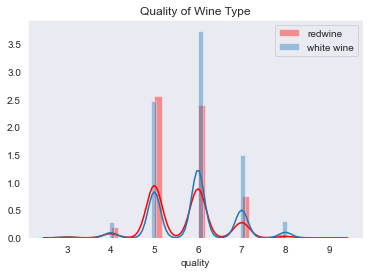

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.distplot(red_wine_quality, kde = True, color = "red", label = 'redwine')
sns.distplot(white_wine_quality, kde = True, label = 'white wine')

plt.title("Quality of Wine Type")
plt.legend()
plt.show()

- 01~02행 시각화에 필요한 패키지를 로드
- 03행 히스토그램 차트의 배경색 스타일을 설정
- 04행 레드 와인에 대한 distplot 객체를 생성
- 05행 화이트 와인에 대한 distplot 객체를 생성
- 07행 차트 제목을 설정
- 08행 차트 범례를 설정
- 09행 설정한 내용대로 차트를 표시

### 5-2) 부분 회귀 플롯으로 시각화하기

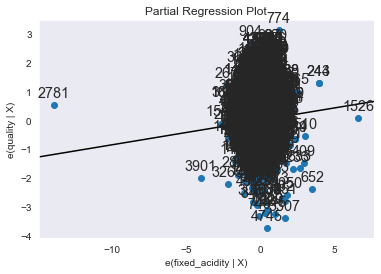

In [26]:
import statsmodels.api as sm
others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", others, data = wine, ret_coords = True)
plt.show()

- 01행 부분 회귀 계산을 위해 statsmodels.api를 로드
- 02행 부분 회귀에 사용한 독립 변수와 종속 변수를 제외한 나머지 변수 이름을 리스트 others로 추출
- 03행 나머지 변수는 고정하고 fixed_acidity가 종속 변수 quality에 미치는 영향에 부분회귀를 수행
- 04행 부분 회귀의 결과를 플롯으로 시각화하여 나타냄

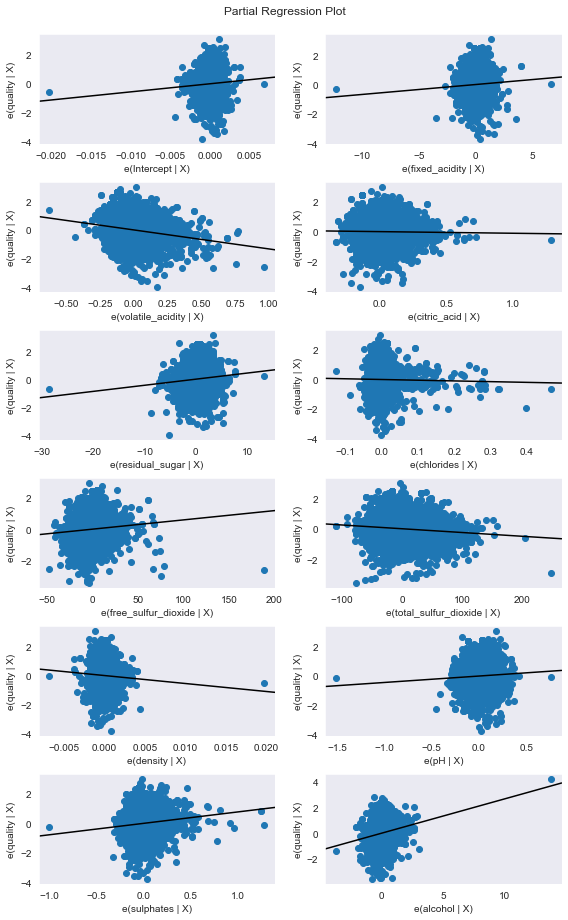

In [27]:
fig = plt.figure(figsize = (8, 13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

- 01행 차트의 크기를 지정
- 02행 다중 선형 회귀 분석 결과를 가지고 있는 regression_result를 이용해 각 독립 변수의 부분 회귀 플롯을 구함
- 03행 부분 회귀 결과를 플롯으로 시각화하여 나타냄